In [1]:
import pandas as pd

df = pd.read_csv('/Users/iamwafula/GitHub/kendickLamarVDrake/drake_kendrick_lyrics_with_emotions.csv')

df.head()

,lyric,artist,title,url,anger_score,disgust_score,fear_score,joy_score,neutral_score,sadness_score,surprise_score,pred,label,score
0,"""Bro, we can go back right now, my nigga. Like...",kendrick,"Sing About Me, I’m Dying of Thirst",NaN,0.837983,0.113133,0.012981,0.003175,0.017429,0.010591,0.004708,1,POSITIVE,0.992175
1,If my pockets is something you're trying to gr...,kendrick,Before He Was Famous Freestyle (Nickerson Gard...,https://genius.com/Kendrick-lamar-before-he-wa...,0.373982,0.291291,0.023212,0.003891,0.278380,0.017473,0.011771,0,NEGATIVE,0.997476
2,"""Not everyone can handle this pressure and, in...",drake,Supermax*,https://genius.com/Drake-supermax-lyrics,0.042161,0.037312,0.018057,0.001319,0.869315,0.016319,0.015518,1,POSITIVE,0.978702
3,I do this shit for my niggas that’s locking up...,kendrick,TDE Roll Call,https://genius.com/Jay-rock-tde-roll-call-lyrics,0.461967,0.485641,0.012308,0.001579,0.016589,0.015936,0.005980,0,NEGATIVE,0.983425
4,"They not like us, they not like us, they not l...",kendrick,Not Like Us (Mixed),https://genius.com/Kendrick-lamar-not-like-us-...,0.334479,0.385358,0.019169,0.007115,0.178273,0.070857,0.004750,0,NEGATIVE,0.998171


In [2]:

df = df.copy()
df['artist'] = df['artist'].apply(lambda x: 'kendrick' if str(x).lower().replace(" ", "").replace("_", "") in ['kendricklamar', 'kendrick'] else x)
df['artist'] = df['artist'].apply(lambda x: 'drake' if str(x).lower().replace(" ", "").replace("_", "") == 'drake' else x)
df = df[df['artist'].isin(['kendrick', 'drake'])]

In [3]:
# order by anger_score
df_anger = df.sort_values(by='anger_score', ascending=False)

# order by sadness_score
df_sadness = df.sort_values(by='sadness_score', ascending=False)

# order by joy_score
df_joy = df.sort_values(by='joy_score', ascending=False)

# order by fear_score
df_fear = df.sort_values(by='fear_score', ascending=False)

# order by disgust_score
df_disgust = df.sort_values(by='disgust_score', ascending=False)

# order by neutral_score
df_neutral = df.sort_values(by='neutral_score', ascending=False)

In [4]:
# Calculate average scores for each emotion by artist
df_anger_averages = df.groupby('artist')['anger_score'].mean()
df_sadness_averages = df.groupby('artist')['sadness_score'].mean()
df_joy_averages = df.groupby('artist')['joy_score'].mean()
df_fear_averages = df.groupby('artist')['fear_score'].mean()
df_disgust_averages = df.groupby('artist')['disgust_score'].mean()
df_neutral_averages = df.groupby('artist')['neutral_score'].mean()

# Display all averages
print("Anger Averages:")
print(df_anger_averages)
print("\nSadness Averages:")
print(df_sadness_averages)
print("\nJoy Averages:")
print(df_joy_averages)
print("\nFear Averages:")
print(df_fear_averages)
print("\nDisgust Averages:")
print(df_disgust_averages)
print("\nNeutral Averages:")
print(df_neutral_averages)

Anger Averages:
artist
drake       0.144849
kendrick    0.177760
Name: anger_score, dtype: float64

Sadness Averages:
artist
drake       0.084159
kendrick    0.077700
Name: sadness_score, dtype: float64

Joy Averages:
artist
drake       0.080397
kendrick    0.069871
Name: joy_score, dtype: float64

Fear Averages:
artist
drake       0.048699
kendrick    0.060589
Name: fear_score, dtype: float64

Disgust Averages:
artist
drake       0.104184
kendrick    0.119464
Name: disgust_score, dtype: float64

Neutral Averages:
artist
drake       0.444367
kendrick    0.411632
Name: neutral_score, dtype: float64


In [5]:
# get highest score for each artist, overall 
df_highest_anger = df.sort_values(by='anger_score', ascending=False).head(1)
df_highest_sadness = df.sort_values(by='sadness_score', ascending=False).head(1)
df_highest_joy = df.sort_values(by='joy_score', ascending=False).head(1)
df_highest_fear = df.sort_values(by='fear_score', ascending=False).head(1)
df_highest_disgust = df.sort_values(by='disgust_score', ascending=False).head(1)
df_highest_neutral = df.sort_values(by='neutral_score', ascending=False).head(1)

In [6]:
print("Highest Anger:")
print(df_highest_anger["artist"], df_highest_anger["lyric"])
print("Highest Sadness:")
print(df_highest_sadness["artist"], df_highest_sadness["lyric"])
print("Highest Joy:")
print(df_highest_joy["artist"], df_highest_joy["lyric"])
print("Highest Fear:")
print(df_highest_fear["artist"], df_highest_fear["lyric"])
print("Highest Disgust:")
print(df_highest_disgust["artist"], df_highest_disgust["lyric"])
print("Highest Neutral:")
print(df_highest_neutral["artist"], df_highest_neutral["lyric"])



Highest Anger:
85779    kendrick
Name: artist, dtype: object 85779    Angry paper, got mad riches
Name: lyric, dtype: object
Highest Sadness:
92331    drake
Name: artist, dtype: object 92331    I've loved and I've lost
Name: lyric, dtype: object
Highest Joy:
75381    drake
Name: artist, dtype: object 75381    I feel fantastic right now, baby
Name: lyric, dtype: object
Highest Fear:
39958    kendrick
Name: artist, dtype: object 39958    I was valedictorian, I was fearful of judgment
Name: lyric, dtype: object
Highest Disgust:
11888    kendrick
Name: artist, dtype: object 11888    Spazzing on tracks – translation: I'm disgusti...
Name: lyric, dtype: object
Highest Neutral:
75078    kendrick
Name: artist, dtype: object 75078    If you want, just ask for a clip
Name: lyric, dtype: object


In [ ]:
# drake angriest 3 lyrics 
drake_angry_lyrics = df[df['artist'] == 'drake'].sort_values(by='anger_score', ascending=False)[['artist', 'lyric', 'anger_score']].head(3)
print("Drake's Angriest Lyrics:")
print(drake_angry_lyrics)

# kendrick angriest 3 lyrics
kendrick_angry_lyrics = df[df['artist'] == 'kendrick'].sort_values(by='anger_score', ascending=False)[['artist', 'lyric', 'anger_score']].head(3)
print("Kendrick's Angriest Lyrics:")
print(kendrick_angry_lyrics)

# drake happiest 3 lyrics
drake_happy_lyrics = df[df['artist'] == 'drake'].sort_values(by='joy_score', ascending=False)[['artist', 'lyric', 'joy_score']].head(3)
print("Drake's Happiest Lyrics:")
print(drake_happy_lyrics)

# kendrick happiest 3 lyrics
kendrick_happy_lyrics = df[df['artist'] == 'kendrick'].sort_values(by='joy_score', ascending=False)[['artist', 'lyric', 'joy_score']].head(3)
print("Kendrick's Happiest Lyrics:")
print(kendrick_happy_lyrics)

# drake most fearful 3 lyrics
drake_fearful_lyrics = df[df['artist'] == 'drake'].sort_values(by='fear_score', ascending=False)[['artist', 'lyric', 'fear_score']].head(3)
print("Drake's Most Fearful Lyrics:")
print(drake_fearful_lyrics)

# kendrick most fearful 3 lyrics
kendrick_fearful_lyrics = df[df['artist'] == 'kendrick'].sort_values(by='fear_score', ascending=False)[['artist', 'lyric', 'fear_score']].head(3)
print("Kendrick's Most Fearful Lyrics:")
print(kendrick_fearful_lyrics)

# drake most disgusted 3 lyrics
drake_disgusted_lyrics = df[df['artist'] == 'drake'].sort_values(by='disgust_score', ascending=False)[['artist', 'lyric', 'disgust_score']].head(3)
print("Drake's Most Disgusted Lyrics:")
print(drake_disgusted_lyrics)

# kendrick most disgusted 3 lyrics
kendrick_disgusted_lyrics = df[df['artist'] == 'kendrick'].sort_values(by='disgust_score', ascending=False)[['artist', 'lyric', 'disgust_score']].head(3)
print("Kendrick's Most Disgusted Lyrics:")
print(kendrick_disgusted_lyrics)

# drake most surprised 3 lyrics
drake_surprised_lyrics = df[df['artist'] == 'drake'].sort_values(by='surprise_score', ascending=False)[['artist', 'lyric', 'surprise_score']].head(3)
print("Drake's Most Surprised Lyrics:")
print(drake_surprised_lyrics)

# kendrick most surprised 3 lyrics
kendrick_surprised_lyrics = df[df['artist'] == 'kendrick'].sort_values(by='surprise_score', ascending=False)[['artist', 'lyric', 'surprise_score']].head(3)
print("Kendrick's Most Surprised Lyrics:")
print(kendrick_surprised_lyrics)

# drake most sad 3 lyrics
drake_sad_lyrics = df[df['artist'] == 'drake'].sort_values(by='sadness_score', ascending=False)[['artist', 'lyric', 'sadness_score']].head(3)
print("Drake's Most Sad Lyrics:")
print(drake_sad_lyrics)

# kendrick most sad 3 lyrics
kendrick_sad_lyrics = df[df['artist'] == 'kendrick'].sort_values(by='sadness_score', ascending=False)[['artist', 'lyric', 'sadness_score']].head(3)
print("Kendrick's Most Sad Lyrics:")
print(kendrick_sad_lyrics)

# drake most neutral 3 lyrics
drake_neutral_lyrics = df[df['artist'] == 'drake'].sort_values(by='neutral_score', ascending=False)[['artist', 'lyric', 'neutral_score']].head(3)
print("Drake's Most Neutral Lyrics:")
print(drake_neutral_lyrics)

# kendrick most neutral 3 lyrics
kendrick_neutral_lyrics = df[df['artist'] == 'kendrick'].sort_values(by='score', ascending=False)[['artist', 'lyric', 'neutral_score']].head(3)
print("Kendrick's Most Neutral Lyrics:")
print(kendrick_neutral_lyrics)


# sentiment analysis 

# kendrick's most positive lyrics
# Kendrick's 10 most positive unique lyrics
kendrick_positive_lyrics = (
    df[(df['artist'] == 'kendrick') & (df['pred'] == 1)]
    .drop_duplicates(subset=['lyric'])
    .sort_values(by='score', ascending=False)[['artist', 'lyric', 'score']]
    .head(10)
)
print("Kendrick's Most Positive Lyrics:")
print(kendrick_positive_lyrics)

# Drake's 10 most positive unique lyrics
drake_positive_lyrics = (
    df[(df['artist'] == 'drake') & (df['pred'] == 1)]
    .drop_duplicates(subset=['lyric'])
    .sort_values(by='score', ascending=False)[['artist', 'lyric', 'score']]
    .head(10)
)
print("Drake's Most Positive Lyrics:")
print(drake_positive_lyrics)

# Kendrick's 10 most negative unique lyrics
kendrick_negative_lyrics = (
    df[(df['artist'] == 'kendrick') & (df['pred'] == 0)]
    .drop_duplicates(subset=['lyric'])
    .sort_values(by='score', ascending=False)[['artist', 'lyric', 'score']]
    .head(10)
)
print("Kendrick's Most Negative Lyrics:")
print(kendrick_negative_lyrics)

# Drake's 10 most negative unique lyrics
drake_negative_lyrics = (
    df[(df['artist'] == 'drake') & (df['pred'] == 0)]
    .drop_duplicates(subset=['lyric'])
    .sort_values(by='score', ascending=False)[['artist', 'lyric', 'score']]
    .head(10)
)
print("Drake's Most Negative Lyrics:")
print(drake_negative_lyrics)



















Drake's Angriest Lyrics:
       artist                                    lyric  anger_score
101115  drake                        Angry adolescents     0.989921
84002   drake             Disrespect 6ix, how dare men     0.986525
57408   drake  I was born to provoke those born to die     0.984780
Kendrick's Angriest Lyrics:
          artist                                              lyric  \
85779   kendrick                        Angry paper, got mad riches   
22624   kendrick  I'm throwing them rocks back with the fury of ...   
101098  kendrick                                  Angry adolescents   

        anger_score  
85779      0.993390  
22624      0.990731  
101098     0.989921  
Drake's Happiest Lyrics:
      artist                             lyric  joy_score
75381  drake  I feel fantastic right now, baby   0.992560
94503  drake            I feel so lucky indeed   0.991200
88242  drake        When we make a joyful song   0.990942
Kendrick's Happiest Lyrics:
         artist  

In [26]:
# Calculate range metrics for each emotion by artist
import numpy as np

emotion_cols = ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 
                'neutral_score', 'sadness_score', 'surprise_score']

# Calculate standard deviation (measure of spread/range)
range_stats = pd.DataFrame()

for emotion in emotion_cols:
    emotion_name = emotion.replace('_score', '').capitalize()
    stats = df.groupby('artist')[emotion].agg([
        ('min', 'min'),
        ('max', 'max'),
        ('range', lambda x: x.max() - x.min()),
        ('std', 'std'),
        ('iqr', lambda x: x.quantile(0.75) - x.quantile(0.25))
    ])
    stats.columns = [f'{emotion_name}_{col}' for col in stats.columns]
    range_stats = pd.concat([range_stats, stats], axis=1)

print("Emotional Range Statistics by Artist:")
print("="*80)
print(range_stats)
print("\n")

# Show which artist has more range for each emotion
print("Artist with GREATER RANGE by Emotion:")
print("="*80)
for emotion in emotion_cols:
    emotion_name = emotion.replace('_score', '').capitalize()
    std_col = f'{emotion_name}_std'
    if range_stats.loc['drake', std_col] > range_stats.loc['kendrick', std_col]:
        winner = 'DRAKE'
        diff = range_stats.loc['drake', std_col] - range_stats.loc['kendrick', std_col]
    else:
        winner = 'KENDRICK'
        diff = range_stats.loc['kendrick', std_col] - range_stats.loc['drake', std_col]
    
    print(f"{emotion_name:12s}: {winner:10s} (std diff: {diff:.4f})")


Emotional Range Statistics by Artist:
          Anger_min  Anger_max  Anger_range  Anger_std  Anger_iqr  \
artist                                                              
drake      0.000447   0.989921     0.989474   0.221840   0.147303   
kendrick   0.000565   0.993390     0.992825   0.251329   0.216221   

          Disgust_min  Disgust_max  Disgust_range  Disgust_std  Disgust_iqr  \
artist                                                                        
drake        0.000323     0.983877       0.983554     0.160518     0.108099   
kendrick     0.000319     0.990473       0.990154     0.177342     0.127356   

          ...  Sadness_min  Sadness_max  Sadness_range  Sadness_std  \
artist    ...                                                         
drake     ...     0.000823     0.989554       0.988731     0.165304   
kendrick  ...     0.000823     0.988995       0.988173     0.159122   

          Sadness_iqr  Surprise_min  Surprise_max  Surprise_range  \
artist        

/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/4163907645.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('artist').apply(lambda x: x.sample(min(len(x), 3000), random_state=42)).reset_index(drop=True)


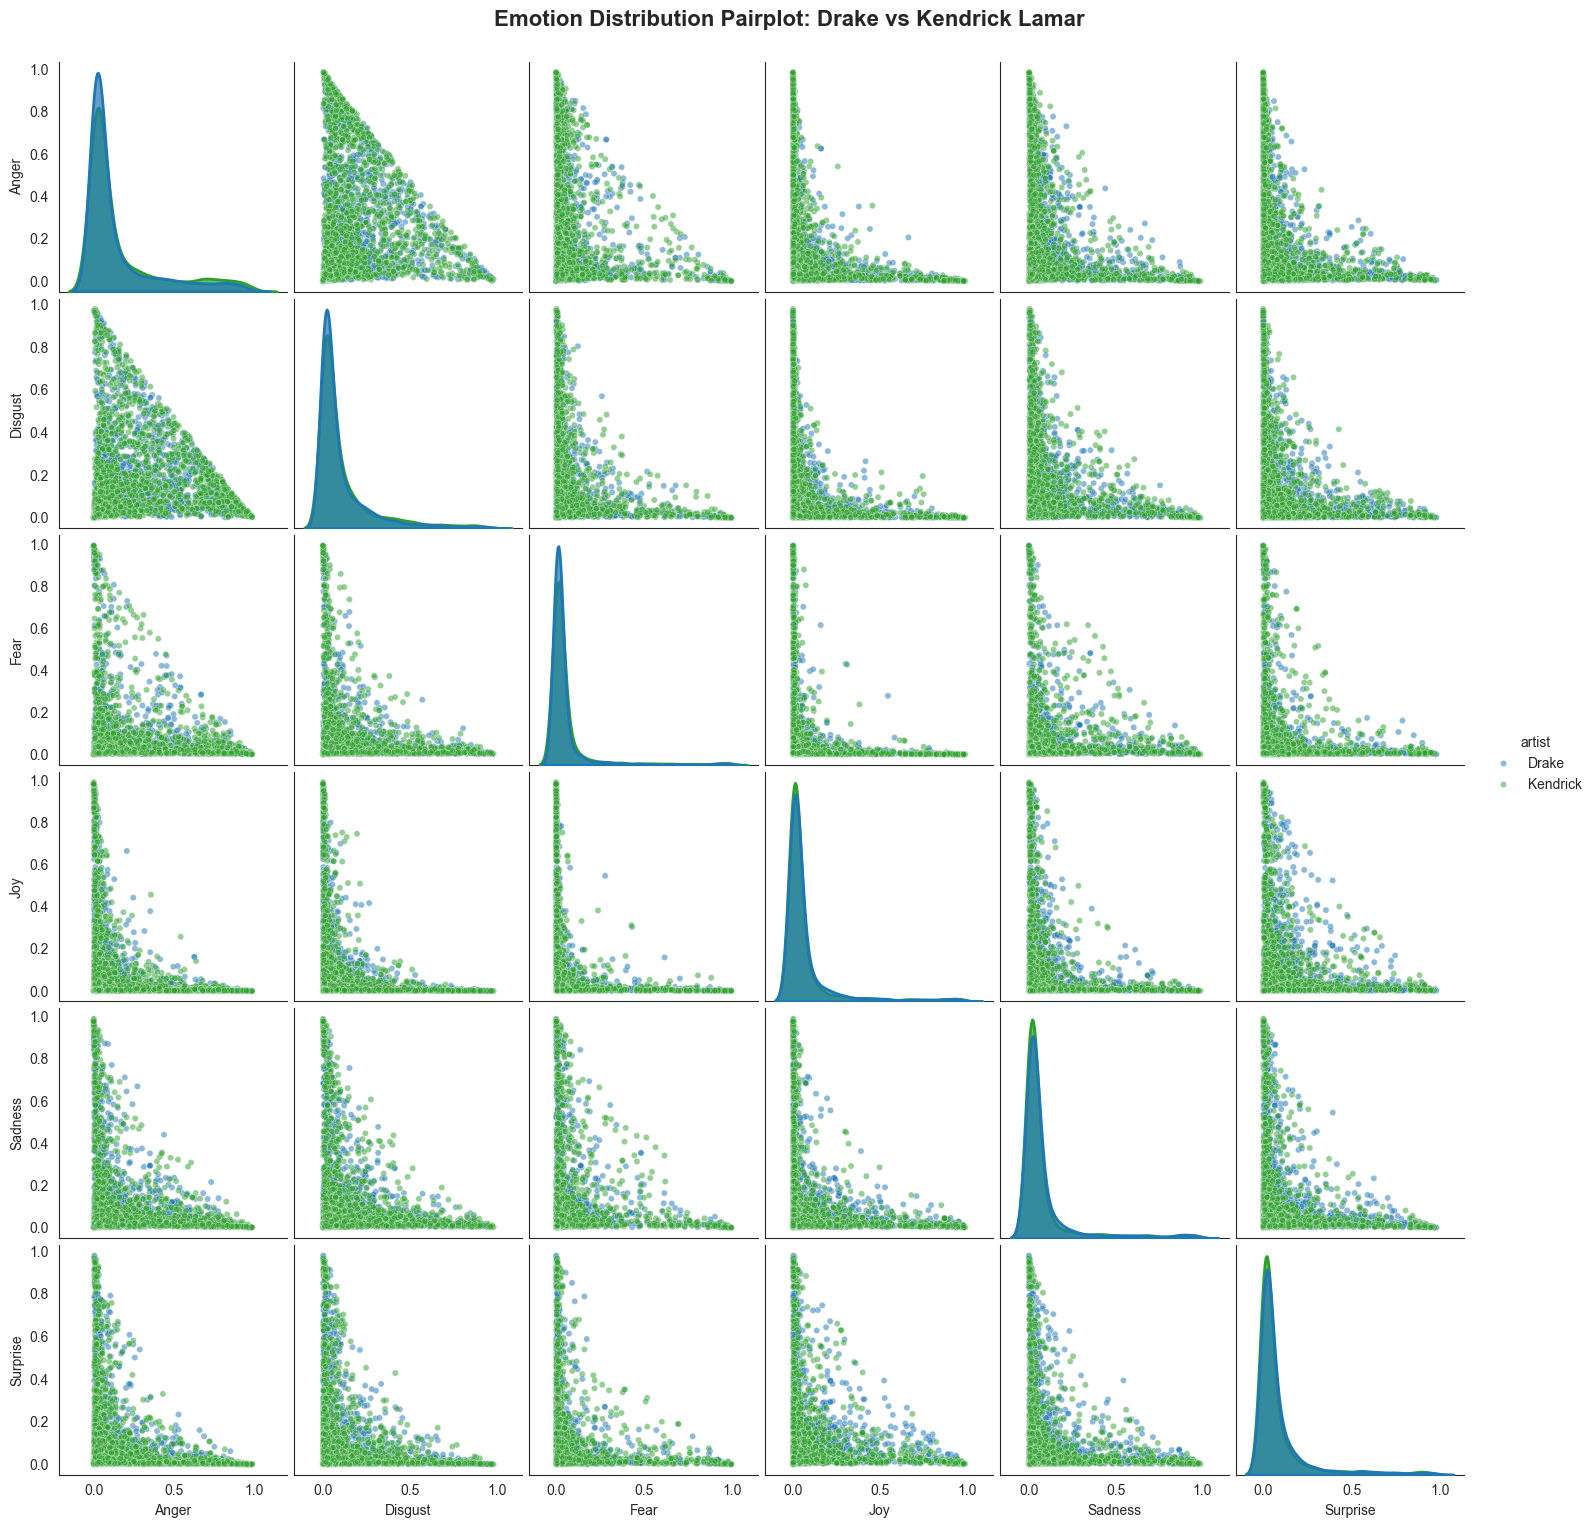

Pairplot saved to viz/emotion_pairplot.png


In [ ]:
# pairplot to visualize emotional range by artist
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for pairplot - sample for performance
df_sample = df.groupby('artist').apply(lambda x: x.sample(min(len(x), 3000), random_state=42)).reset_index(drop=True)

# Capitalize artist names
df_sample['artist'] = df_sample['artist'].str.capitalize()

# Select only emotion columns and artist
emotion_cols = ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 
                'sadness_score', 'surprise_score']
plot_data = df_sample[emotion_cols + ['artist']].copy()

# Rename columns for cleaner labels
plot_data.columns = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'artist']

# Create pairplot
sns.set_style("white")
g = sns.pairplot(plot_data, hue='artist', palette={'Drake': '#1f77b4', 'Kendrick': '#2ca02c'},
                 diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20}, 
                 diag_kws={'alpha': 0.7, 'linewidth': 2},
                 height=2.5, aspect=1)

g.fig.suptitle('Emotion Distribution Pairplot: Drake vs Kendrick Lamar', 
               y=1.02, fontsize=16, fontweight='bold')

plt.savefig('viz/emotion_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Pairplot saved to viz/emotion_pairplot.png")


/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/76685502.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='artist', y=emotion, ax=ax,
/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/76685502.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df_plot.groupby('artist').apply(
/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/76685502.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

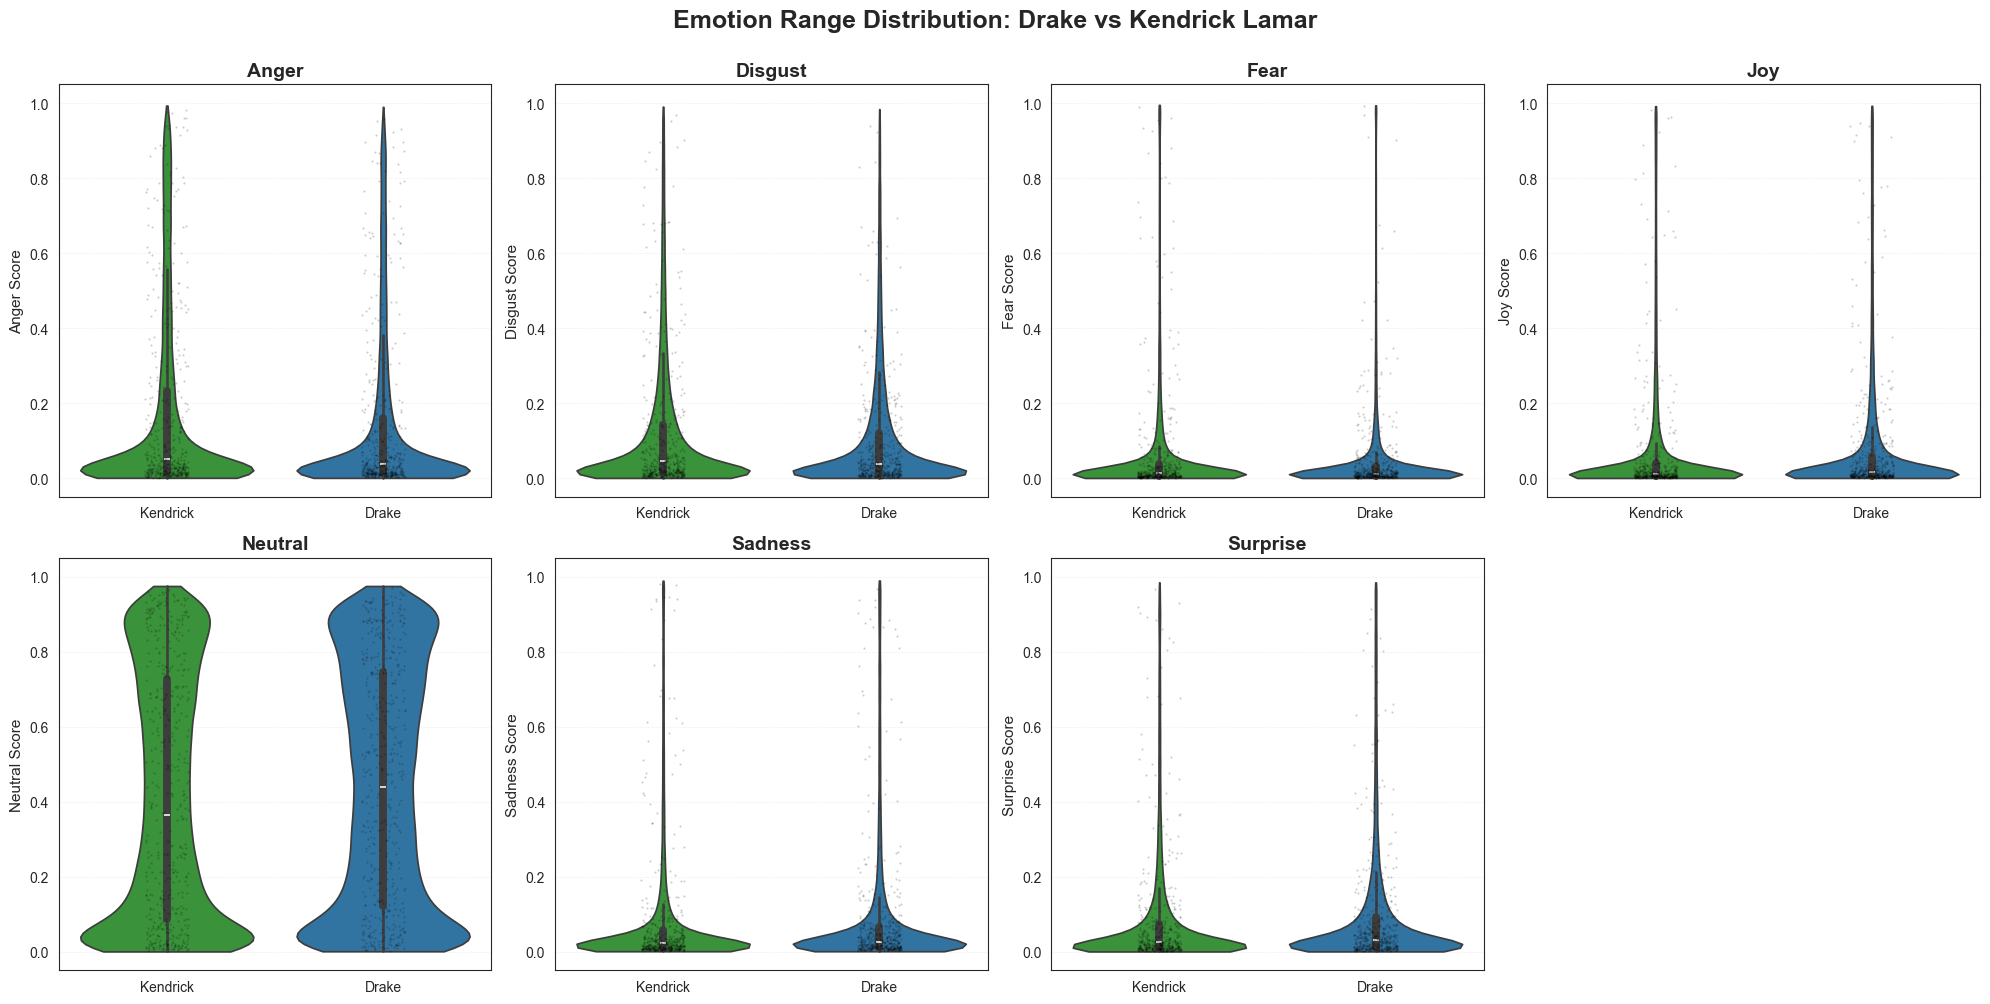

Violin plots saved to viz/emotion_violin_plots.png

Violin plot interpretation:
- Width of violin = density/frequency of scores at that level
- Wider sections = more lyrics with those emotion scores
- Taller violin = greater range of emotion


In [ ]:
# violin plots to show distribution and range for each emotion
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

emotion_cols = ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 
                'neutral_score', 'sadness_score', 'surprise_score']

df_plot = df.copy()
df_plot['artist'] = df_plot['artist'].str.capitalize()

for idx, emotion in enumerate(emotion_cols):
    ax = axes[idx]
    
    # Create violin plot
    sns.violinplot(data=df_plot, x='artist', y=emotion, ax=ax,
                   palette={'Drake': '#1f77b4', 'Kendrick': '#2ca02c'},
                   inner='box', cut=0)
    
    # Overlay strip plot with sample for context
    df_sample = df_plot.groupby('artist').apply(
        lambda x: x.sample(min(len(x), 500), random_state=42)
    ).reset_index(drop=True)
    
    sns.stripplot(data=df_sample, x='artist', y=emotion, ax=ax,
                  color='black', alpha=0.2, size=1.5)
    
    # Customize
    emotion_name = emotion.replace('_score', '').capitalize()
    ax.set_title(f'{emotion_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(f'{emotion_name} Score', fontsize=11)
    ax.set_ylim(-0.05, 1.05)
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Remove extra subplot
fig.delaxes(axes[7])

plt.suptitle('Emotion Range Distribution: Drake vs Kendrick Lamar', 
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('viz/emotion_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Violin plots saved to viz/emotion_violin_plots.png")
print("\nViolin plot interpretation:")
print("- Width of violin = density/frequency of scores at that level")
print("- Wider sections = more lyrics with those emotion scores")
print("- Taller violin = greater range of emotion")


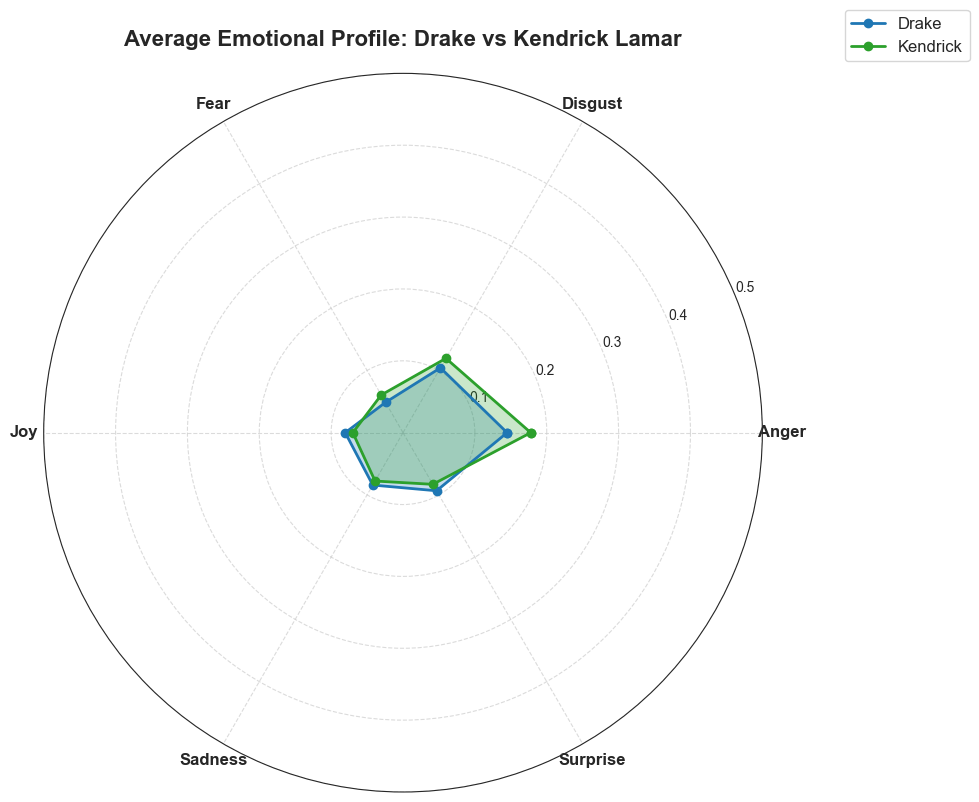

Radar chart saved to viz/emotion_radar_chart.png

Average emotion scores:
--------------------------------------------------
Anger      - Drake: 0.1448, Kendrick: 0.1778
Disgust    - Drake: 0.1042, Kendrick: 0.1195
Fear       - Drake: 0.0487, Kendrick: 0.0606
Joy        - Drake: 0.0804, Kendrick: 0.0699
Sadness    - Drake: 0.0842, Kendrick: 0.0777
Surprise   - Drake: 0.0933, Kendrick: 0.0830


In [29]:
# Create radar chart showing average emotional profile
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean scores for each emotion
emotion_cols = ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 
                'sadness_score', 'surprise_score']

drake_means = df[df['artist'] == 'drake'][emotion_cols].mean().values
kendrick_means = df[df['artist'] == 'kendrick'][emotion_cols].mean().values

# Set up radar chart
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the circle
drake_means = np.concatenate((drake_means, [drake_means[0]]))
kendrick_means = np.concatenate((kendrick_means, [kendrick_means[0]]))
angles += angles[:1]

# Create plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot data
ax.plot(angles, drake_means, 'o-', linewidth=2, label='Drake', color='#1f77b4')
ax.fill(angles, drake_means, alpha=0.25, color='#1f77b4')

ax.plot(angles, kendrick_means, 'o-', linewidth=2, label='Kendrick', color='#2ca02c')
ax.fill(angles, kendrick_means, alpha=0.25, color='#2ca02c')

# Customize
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=12, fontweight='bold')
ax.set_ylim(0, 0.5)
ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_yticklabels(['0.1', '0.2', '0.3', '0.4', '0.5'], size=10)
ax.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
plt.title('Average Emotional Profile: Drake vs Kendrick Lamar', 
          size=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('viz/emotion_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Radar chart saved to viz/emotion_radar_chart.png")
print("\nAverage emotion scores:")
print("-" * 50)
for i, label in enumerate(labels):
    print(f"{label:10s} - Drake: {drake_means[i]:.4f}, Kendrick: {kendrick_means[i]:.4f}")


In [45]:
# Check sentiment columns and basic stats
print("Sentiment Column Info:")
print("="*80)
print(f"\nTotal rows: {len(df)}")
print(f"\nSentiment value counts:")
print(df['label'].value_counts())
print(f"\nSentiment by artist:")
print(df.groupby(['artist', 'label']).size().unstack(fill_value=0))
print(f"\nAverage confidence score: {df['score'].mean():.4f}")
print(f"\nAverage confidence by sentiment:")
print(df.groupby('label')['score'].mean())


Sentiment Column Info:

Total rows: 108306

Sentiment value counts:
label
NEGATIVE    55087
POSITIVE    53219
Name: count, dtype: int64

Sentiment by artist:
label     NEGATIVE  POSITIVE
artist                      
drake        24558     25213
kendrick     30529     28006

Average confidence score: 0.9881

Average confidence by sentiment:
label
NEGATIVE    0.988393
POSITIVE    0.987771
Name: score, dtype: float64


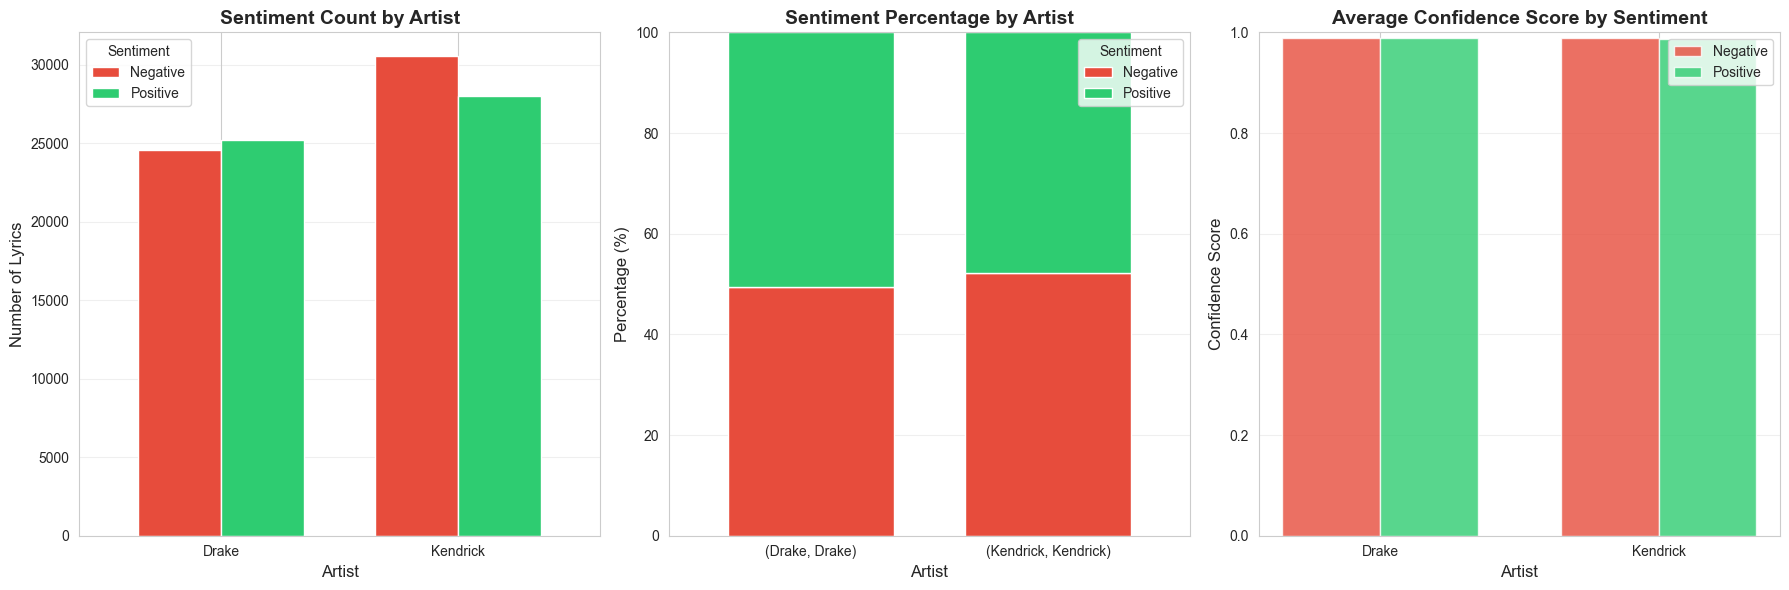

Sentiment comparison saved to viz/sentiment_comparison.png


In [ ]:
# Sentiment distribution comparison by artist
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Sentiment count by artist
df_plot = df.copy()
df_plot['artist'] = df_plot['artist'].str.capitalize()
df_plot['label'] = df_plot['label'].str.capitalize()

sentiment_counts = df_plot.groupby(['artist', 'label']).size().unstack(fill_value=0)
sentiment_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'], width=0.7)
axes[0].set_title('Sentiment Count by Artist', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Artist', fontsize=12)
axes[0].set_ylabel('Number of Lyrics', fontsize=12)
axes[0].legend(title='Sentiment', fontsize=10)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Sentiment percentage by artist
sentiment_pct = df_plot.groupby(['artist', 'label']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack(fill_value=0)
sentiment_pct.plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'], width=0.7, stacked=True)
axes[1].set_title('Sentiment Percentage by Artist', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Artist', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Sentiment', fontsize=10)
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.savefig('viz/sentiment_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Sentiment comparison saved to viz/sentiment_comparison.png")


/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/2821330301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='artist', y='score', ax=axes[0],
/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/2821330301.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df_plot.groupby('artist').apply(


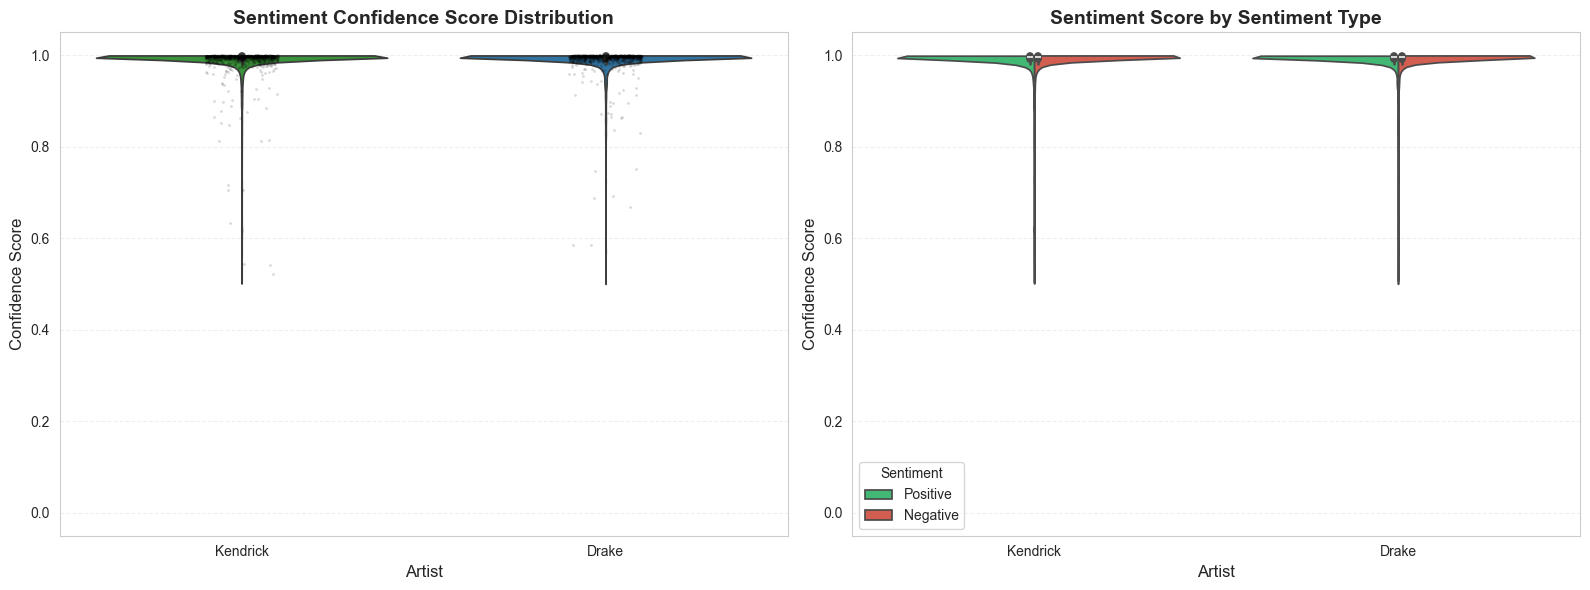

Sentiment score distribution saved to viz/sentiment_score_distribution.png


In [47]:
# Sentiment score distribution (violin plot)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_plot = df.copy()
df_plot['artist'] = df_plot['artist'].str.capitalize()
df_plot['label'] = df_plot['label'].str.capitalize()

# Plot 1: Overall sentiment score distribution by artist
sns.violinplot(data=df_plot, x='artist', y='score', ax=axes[0],
               palette={'Drake': '#1f77b4', 'Kendrick': '#2ca02c'},
               inner='box', cut=0)

# Add sample points
df_sample = df_plot.groupby('artist').apply(
    lambda x: x.sample(min(len(x), 1000), random_state=42)
).reset_index(drop=True)
sns.stripplot(data=df_sample, x='artist', y='score', ax=axes[0],
              color='black', alpha=0.15, size=2)

axes[0].set_title('Sentiment Confidence Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Artist', fontsize=12)
axes[0].set_ylabel('Confidence Score', fontsize=12)
axes[0].set_ylim(-0.05, 1.05)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot 2: Sentiment score by label and artist
sns.violinplot(data=df_plot, x='artist', y='score', hue='label', ax=axes[1],
               palette={'Positive': '#2ecc71', 'Negative': '#e74c3c'},
               split=True, inner='box', cut=0)

axes[1].set_title('Sentiment Score by Sentiment Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Artist', fontsize=12)
axes[1].set_ylabel('Confidence Score', fontsize=12)
axes[1].set_ylim(-0.05, 1.05)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].legend(title='Sentiment', fontsize=10)

plt.tight_layout()
plt.savefig('viz/sentiment_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Sentiment score distribution saved to viz/sentiment_score_distribution.png")


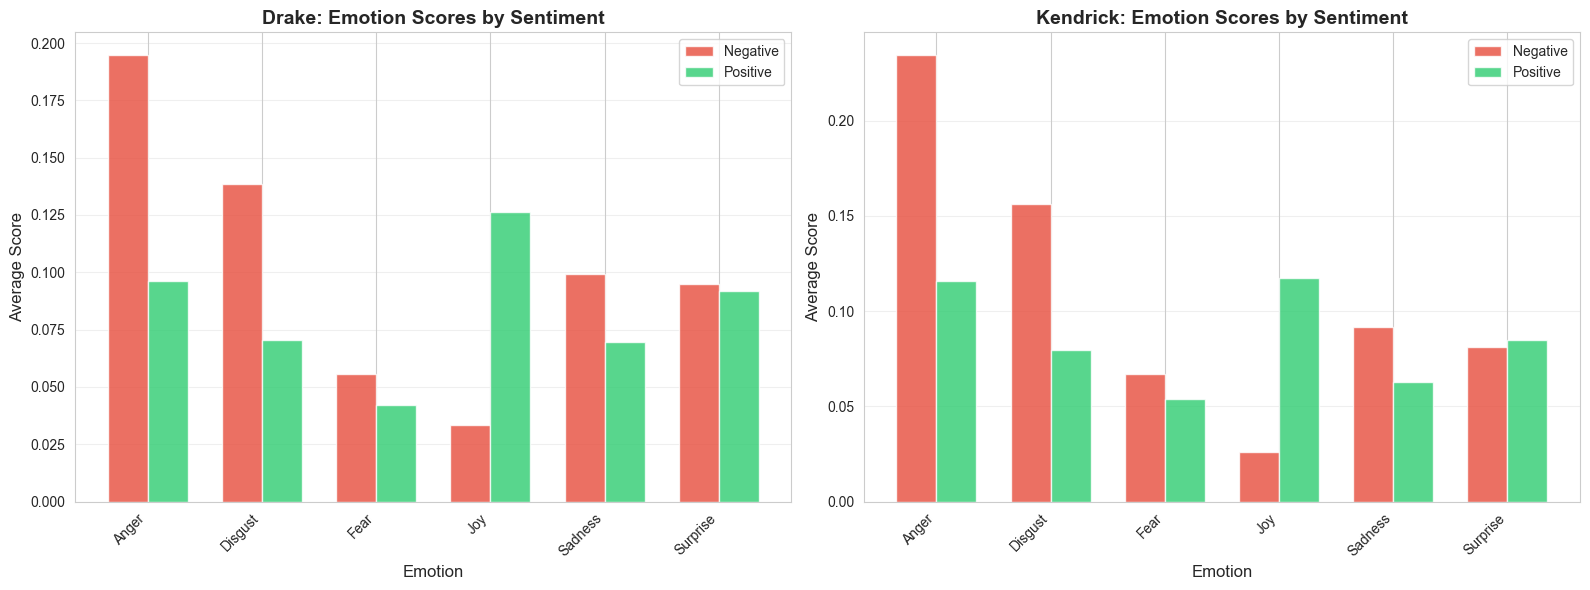

Emotions by sentiment saved to viz/emotions_by_sentiment.png


In [41]:
# Relationship between emotions and sentiment
emotion_cols = ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 
                'sadness_score', 'surprise_score']

df_plot = df.copy()
df_plot['artist'] = df_plot['artist'].str.capitalize()
df_plot['label'] = df_plot['label'].str.capitalize()

# Calculate average emotion scores by sentiment
emotion_by_sentiment = df_plot.groupby(['artist', 'label'])[emotion_cols].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Drake
drake_data = emotion_by_sentiment.loc['Drake']
x = range(len(emotion_cols))
width = 0.35
labels = [col.replace('_score', '').capitalize() for col in emotion_cols]

axes[0].bar([i - width/2 for i in x], drake_data.loc['Negative'], 
            width, label='Negative', color='#e74c3c', alpha=0.8)
axes[0].bar([i + width/2 for i in x], drake_data.loc['Positive'], 
            width, label='Positive', color='#2ecc71', alpha=0.8)
axes[0].set_title('Drake: Emotion Scores by Sentiment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Emotion', fontsize=12)
axes[0].set_ylabel('Average Score', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Plot for Kendrick
kendrick_data = emotion_by_sentiment.loc['Kendrick']
axes[1].bar([i - width/2 for i in x], kendrick_data.loc['Negative'], 
            width, label='Negative', color='#e74c3c', alpha=0.8)
axes[1].bar([i + width/2 for i in x], kendrick_data.loc['Positive'], 
            width, label='Positive', color='#2ecc71', alpha=0.8)
axes[1].set_title('Kendrick: Emotion Scores by Sentiment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Emotion', fontsize=12)
axes[1].set_ylabel('Average Score', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('viz/emotions_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print("Emotions by sentiment saved to viz/emotions_by_sentiment.png")


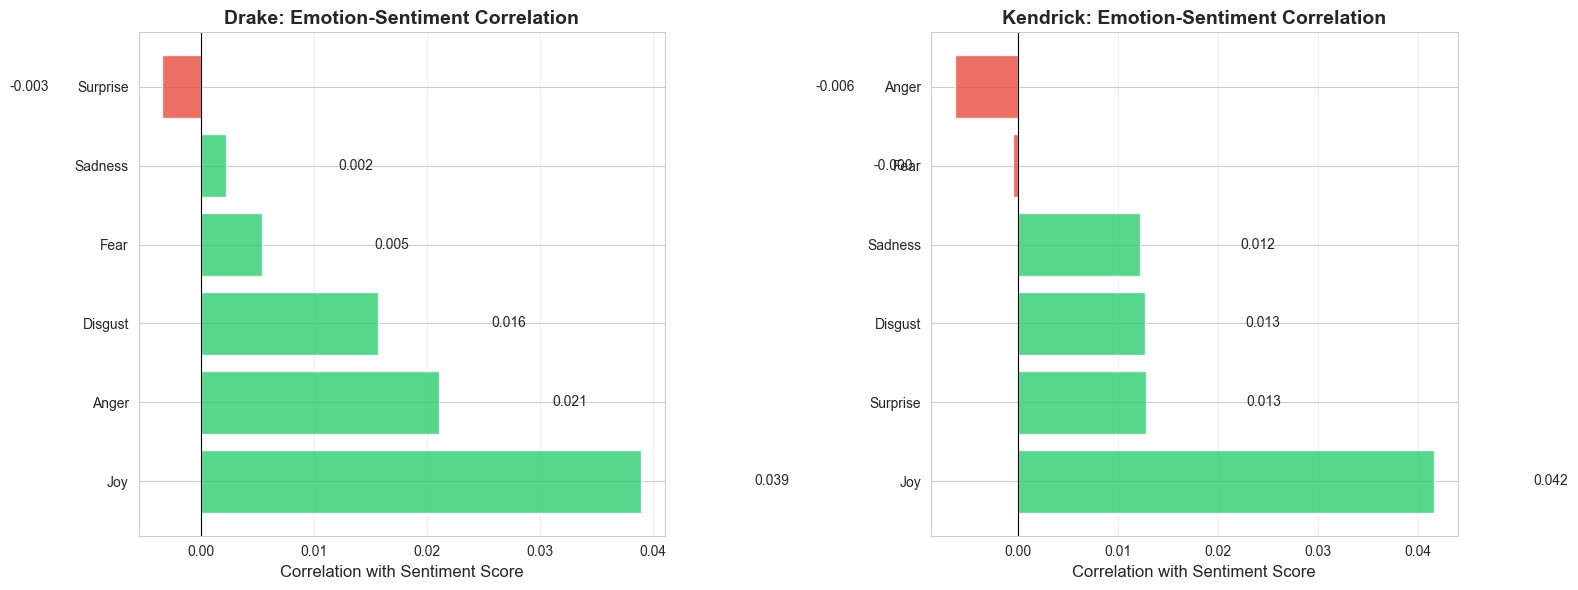

Emotion-sentiment correlation saved to viz/emotion_sentiment_correlation.png

Interpretation:
- Positive correlation = emotion associated with positive sentiment
- Negative correlation = emotion associated with negative sentiment


In [42]:
# Heatmap: Correlation between sentiment score and emotions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Drake correlation
drake_df = df[df['artist'] == 'drake'][emotion_cols + ['score']].copy()
drake_corr = drake_df.corr()['score'].drop('score').sort_values(ascending=False)

axes[0].barh(range(len(drake_corr)), drake_corr.values, 
             color=['#2ecc71' if x > 0 else '#e74c3c' for x in drake_corr.values], alpha=0.8)
axes[0].set_yticks(range(len(drake_corr)))
axes[0].set_yticklabels([col.replace('_score', '').capitalize() for col in drake_corr.index])
axes[0].set_xlabel('Correlation with Sentiment Score', fontsize=12)
axes[0].set_title('Drake: Emotion-Sentiment Correlation', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, v in enumerate(drake_corr.values):
    axes[0].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
                 va='center', ha='left' if v > 0 else 'right', fontsize=10)

# Kendrick correlation
kendrick_df = df[df['artist'] == 'kendrick'][emotion_cols + ['score']].copy()
kendrick_corr = kendrick_df.corr()['score'].drop('score').sort_values(ascending=False)

axes[1].barh(range(len(kendrick_corr)), kendrick_corr.values, 
             color=['#2ecc71' if x > 0 else '#e74c3c' for x in kendrick_corr.values], alpha=0.8)
axes[1].set_yticks(range(len(kendrick_corr)))
axes[1].set_yticklabels([col.replace('_score', '').capitalize() for col in kendrick_corr.index])
axes[1].set_xlabel('Correlation with Sentiment Score', fontsize=12)
axes[1].set_title('Kendrick: Emotion-Sentiment Correlation', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, v in enumerate(kendrick_corr.values):
    axes[1].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
                 va='center', ha='left' if v > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.savefig('viz/emotion_sentiment_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Emotion-sentiment correlation saved to viz/emotion_sentiment_correlation.png")
print("\nInterpretation:")
print("- Positive correlation = emotion associated with positive sentiment")
print("- Negative correlation = emotion associated with negative sentiment")


In [43]:
# Summary statistics
print("="*80)
print("SENTIMENT ANALYSIS SUMMARY")
print("="*80)

df_plot = df.copy()
df_plot['artist'] = df_plot['artist'].str.capitalize()

for artist in ['Drake', 'Kendrick']:
    artist_df = df_plot[df_plot['artist'] == artist]
    total = len(artist_df)
    positive = len(artist_df[artist_df['label'] == 'POSITIVE'])
    negative = len(artist_df[artist_df['label'] == 'NEGATIVE'])
    
    print(f"\n{artist.upper()}:")
    print(f"  Total lyrics: {total:,}")
    print(f"  Positive: {positive:,} ({100*positive/total:.2f}%)")
    print(f"  Negative: {negative:,} ({100*negative/total:.2f}%)")
    print(f"  Avg confidence: {artist_df['score'].mean():.4f}")
    print(f"  Avg confidence (positive): {artist_df[artist_df['label']=='POSITIVE']['score'].mean():.4f}")
    print(f"  Avg confidence (negative): {artist_df[artist_df['label']=='NEGATIVE']['score'].mean():.4f}")

print("\n" + "="*80)

# Who is more positive?
drake_pos_pct = 100 * len(df_plot[(df_plot['artist']=='Drake') & (df_plot['label']=='POSITIVE')]) / len(df_plot[df_plot['artist']=='Drake'])
kendrick_pos_pct = 100 * len(df_plot[(df_plot['artist']=='Kendrick') & (df_plot['label']=='POSITIVE')]) / len(df_plot[df_plot['artist']=='Kendrick'])

if drake_pos_pct > kendrick_pos_pct:
    print(f"\n🎵 DRAKE is more POSITIVE: {drake_pos_pct:.2f}% vs {kendrick_pos_pct:.2f}% (diff: {drake_pos_pct-kendrick_pos_pct:.2f}%)")
else:
    print(f"\n🎵 KENDRICK is more POSITIVE: {kendrick_pos_pct:.2f}% vs {drake_pos_pct:.2f}% (diff: {kendrick_pos_pct-drake_pos_pct:.2f}%)")


SENTIMENT ANALYSIS SUMMARY

DRAKE:
  Total lyrics: 49,771
  Positive: 25,213 (50.66%)
  Negative: 24,558 (49.34%)
  Avg confidence: 0.9883
  Avg confidence (positive): 0.9885
  Avg confidence (negative): 0.9881

KENDRICK:
  Total lyrics: 58,535
  Positive: 28,006 (47.84%)
  Negative: 30,529 (52.16%)
  Avg confidence: 0.9879
  Avg confidence (positive): 0.9871
  Avg confidence (negative): 0.9887


🎵 DRAKE is more POSITIVE: 50.66% vs 47.84% (diff: 2.81%)


/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/2067387512.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df_plot.groupby('artist').apply(lambda x: x.sample(min(len(x), 5000), random_state=42)).reset_index(drop=True)
/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/2067387512.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_sample, x='artist', y=emotion, ax=ax,
/var/folders/2z/w17hcyk95vq2jmk6nm7d2_1r0000gn/T/ipykernel_18533/2067387512.py:26: FutureWarning: DataFrameGroupBy.apply operated 

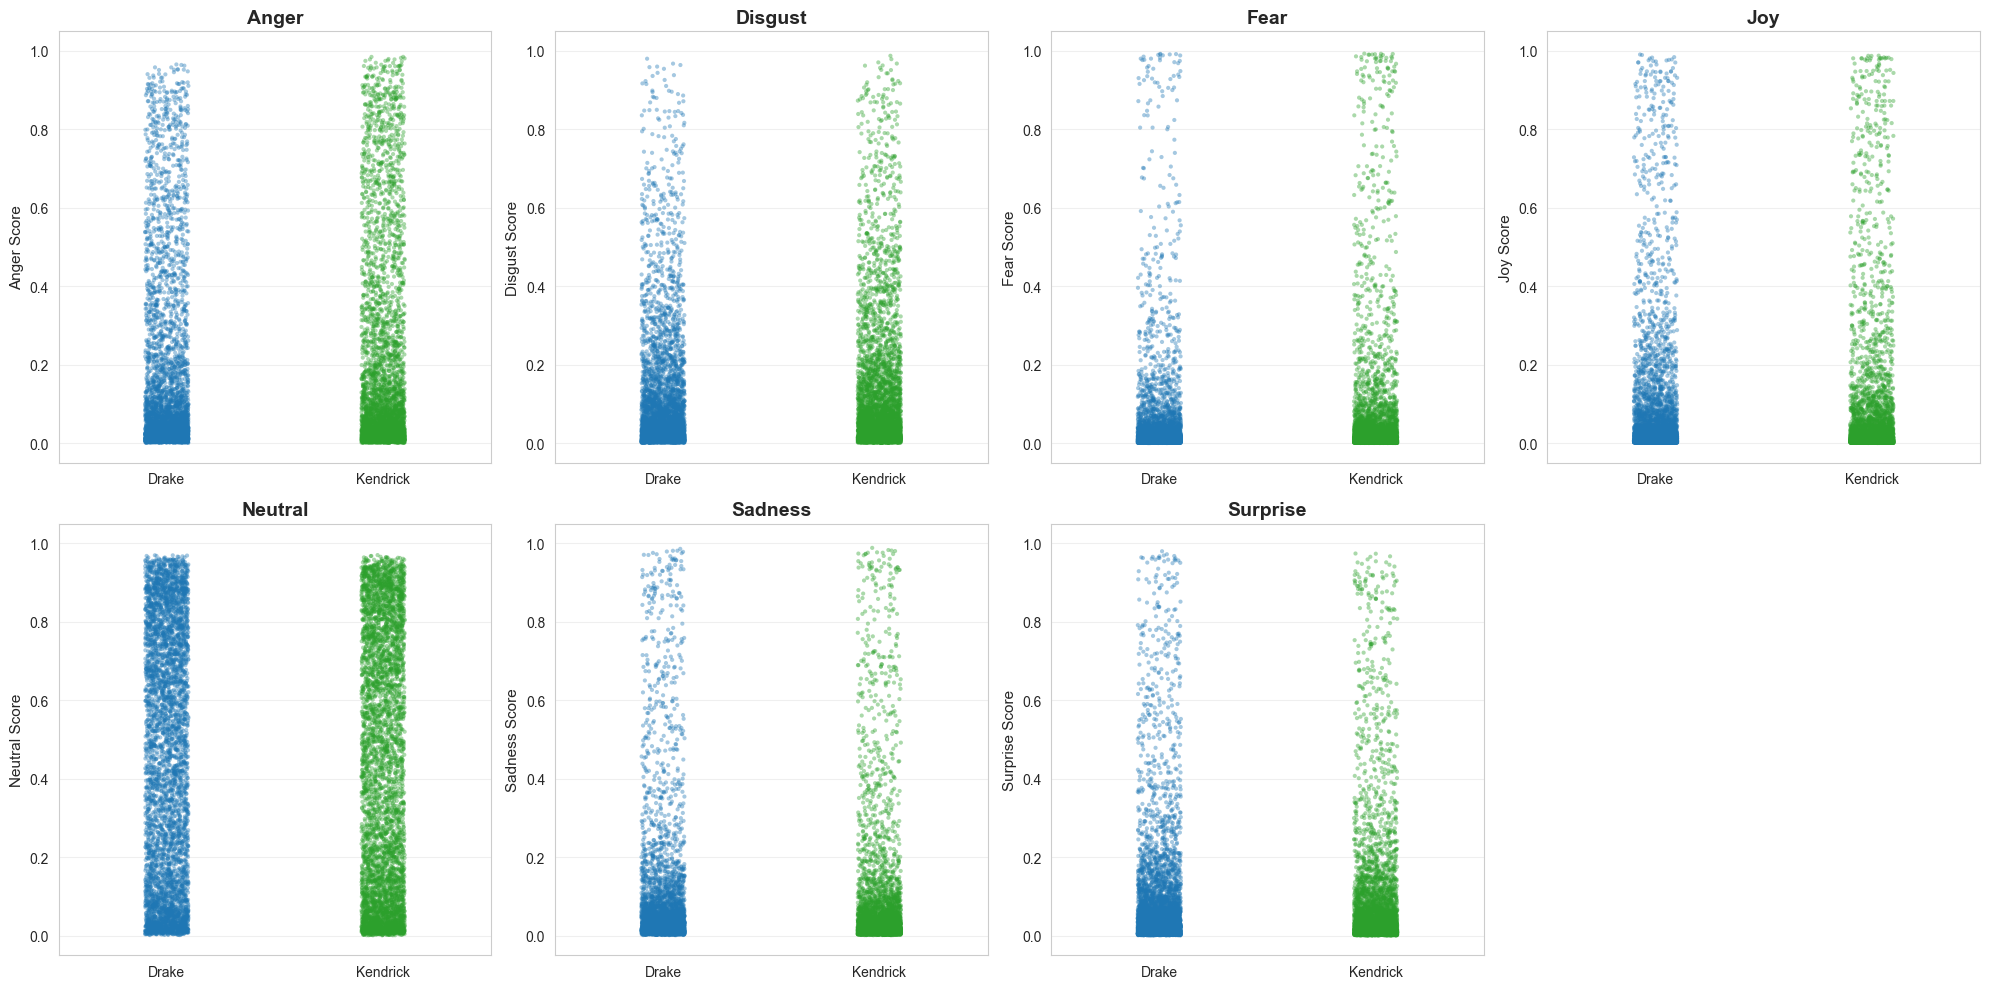

Visualization saved to viz/emotion_range_by_artist.png


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")

# Get emotion columns
emotion_cols = ['anger_score', 'disgust_score', 'fear_score', 'joy_score', 
                'neutral_score', 'sadness_score', 'surprise_score']

# Create figure with subplots for each emotion
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Capitalize artist names for display
df_plot = df.copy()
df_plot['artist'] = df_plot['artist'].str.capitalize()

# Plot each emotion
for idx, emotion in enumerate(emotion_cols):
    ax = axes[idx]
    
    # Sample data if too many points (for better visualization)
    # Using sample of 5000 points per artist for cleaner visualization
    df_sample = df_plot.groupby('artist').apply(lambda x: x.sample(min(len(x), 5000), random_state=42)).reset_index(drop=True)
    
    # Create strip plot
    sns.stripplot(data=df_sample, x='artist', y=emotion, ax=ax, 
                  alpha=0.4, size=3, palette=['#1f77b4', '#2ca02c'])
    
    # Customize the plot
    emotion_name = emotion.replace('_score', '').capitalize()
    ax.set_title(f'{emotion_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(emotion_name + ' Score', fontsize=11)
    ax.set_ylim(-0.05, 1.05)
    ax.grid(axis='y', alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.savefig('viz/emotion_range_by_artist.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to viz/emotion_range_by_artist.png")
